## BUSINESS UNDERSTANDING

### Business Objective

In [3]:
# STANDARD LIBRARIES
import os                          # Interacting with the operating system (file paths, directories)
import math                        # Math functions (e.g., sqrt)
import pickle                      # Save/load Python objects
import joblib                      # Save/load trained models efficiently

# DATA MANIPULATION & NUMERICAL COMPUTATION
import pandas as pd                # Data loading, cleaning, and manipulation
import numpy as np                 # Numerical operations and array manipulation

# VISUALIZATION
import matplotlib.pyplot as plt    # General-purpose plotting
import seaborn as sns              # Statistical data visualization
sns.set(style="whitegrid")         # Makes plots look cleaner
plt.rcParams["figure.figsize"] = (12, 5)  # Default figure size

# STATISTICS
from scipy import stats             # Statistical functions, e.g., z-score, t-tests
from scipy.stats import entropy

# MACHINE LEARNING
import xgboost as xgb               # XGBoost for gradient boosting models
from sklearn.model_selection import (
    train_test_split,              # Split data into train/test sets
    StratifiedKFold,               # Cross-validation preserving class distribution
    GridSearchCV                   # Hyperparameter tuning
)
from sklearn.ensemble import (
    RandomForestClassifier,        # Random Forest classifier
    VotingClassifier,              # Combine multiple models via voting
    GradientBoostingRegressor      # Gradient boosting for regression
)
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.metrics import (
    accuracy_score,
    fbeta_score,                   # F-beta score for classification performance
    precision_recall_curve,        # Precision-recall curve
    classification_report,         # Detailed classification metrics
    mean_squared_error,            # Regression metric
    mean_absolute_error,           # Regression metric
    silhouette_score
)
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.cluster import KMeans                 # Clustering algorithm
from sklearn.decomposition import PCA

# HANDLING IMBALANCED DATA
from imblearn.over_sampling import SMOTE          # Synthetic oversampling for minority class
from imblearn.pipeline import Pipeline            # Pipelines compatible with imbalanced-learn

# MISCELLANEOUS SETTINGS
pd.set_option("display.max_columns", None)       # Display all columns in DataFrame

import warnings
warnings.filterwarnings('ignore')                # Suppress warnings for cleaner output


## DATA UNDERSTANDING

### Dataset Inspection

In [6]:
# File path
data_path = "electricityloaddiagrams20112014/LD2011_2014.txt"

In [7]:
# Load raw dataset
df = pd.read_csv(
    data_path,          
    sep=";",           # Fields are separated by semicolons (common in European CSVs)
    decimal=",",       # Numbers use a comma as decimal separator (e.g., "3,14"); switch to "." if needed
    parse_dates=[0],   # Parse the first column (index 0) as datetime
    index_col=0        # Set the first column as the DataFrame index
)

In [8]:
# Snippet of the data
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.770335,0.0,0.0,0.0,0.0,0.0,0.0,260.416667,45.721750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.203369,0.0,38.342246,20.363985,0.0,1935.185185,158.006363,1965.437788,0.0,0.0,838.461538,0.0,50.756208,24.570605,0.0,137.885196,80.797011,0.0,74.562212,76.792763,41.482587,0.0,0.0,0.0,93.291732,0.0,39.588859,45.717456,0.0,0.0,0.0,13.422819,22.123746,205.835962,327.859238,920.863309,285.607755,266.521027,1826.271186,218.274112,12166.666667,76.612903,148.867314,272.935780,428.414097,173.089071,235.492958,319.354839,447.761194,288.135593,110.538373,345.578231,4235.294118,260.93750,472.868217,84.0,232.558140,603.036876,199.592668,207.532051,1328.903654,113.074205,680.529301,204.301075,1278.481013,81.728267,444.000000,517.333333,0.0,189.121951,325.833980,228.249744,3263.157895,582.689335,62.219731,380.410959,58.148148,84.924782,38.108720,450.

In [9]:
# Confirming the shape
df.shape

(140256, 370)

In [10]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


In [11]:
# Data Statistics
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140

In [12]:
# Missing or Zero Values
df.isnull().sum().sort_values(ascending=True)

MT_001    0
MT_252    0
MT_251    0
MT_250    0
MT_249    0
         ..
MT_120    0
MT_119    0
MT_118    0
MT_127    0
MT_370    0
Length: 370, dtype: int64

In [13]:
# Count negative values
# num_negative = (df_long["consumption_kwh"] < 0).sum()
# print(f"Number of negative values: {num_negative}")

## EXPLORATORY DATA ANALYSIS

### Individual Meter Behaviour

In [16]:
# Individual Meter Behaviour
means = df.mean()           # Calculate mean of each column
means_sorted = means.sort_values(ascending=False)  # Sort descending
print(means_sorted)

MT_362    37607.987537
MT_196    20744.150874
MT_279    12038.971232
MT_370     8722.355145
MT_208     6662.030067
              ...     
MT_117        3.617620
MT_003        2.918308
MT_347        1.844880
MT_160        1.159976
MT_133        0.818058
Length: 370, dtype: float64


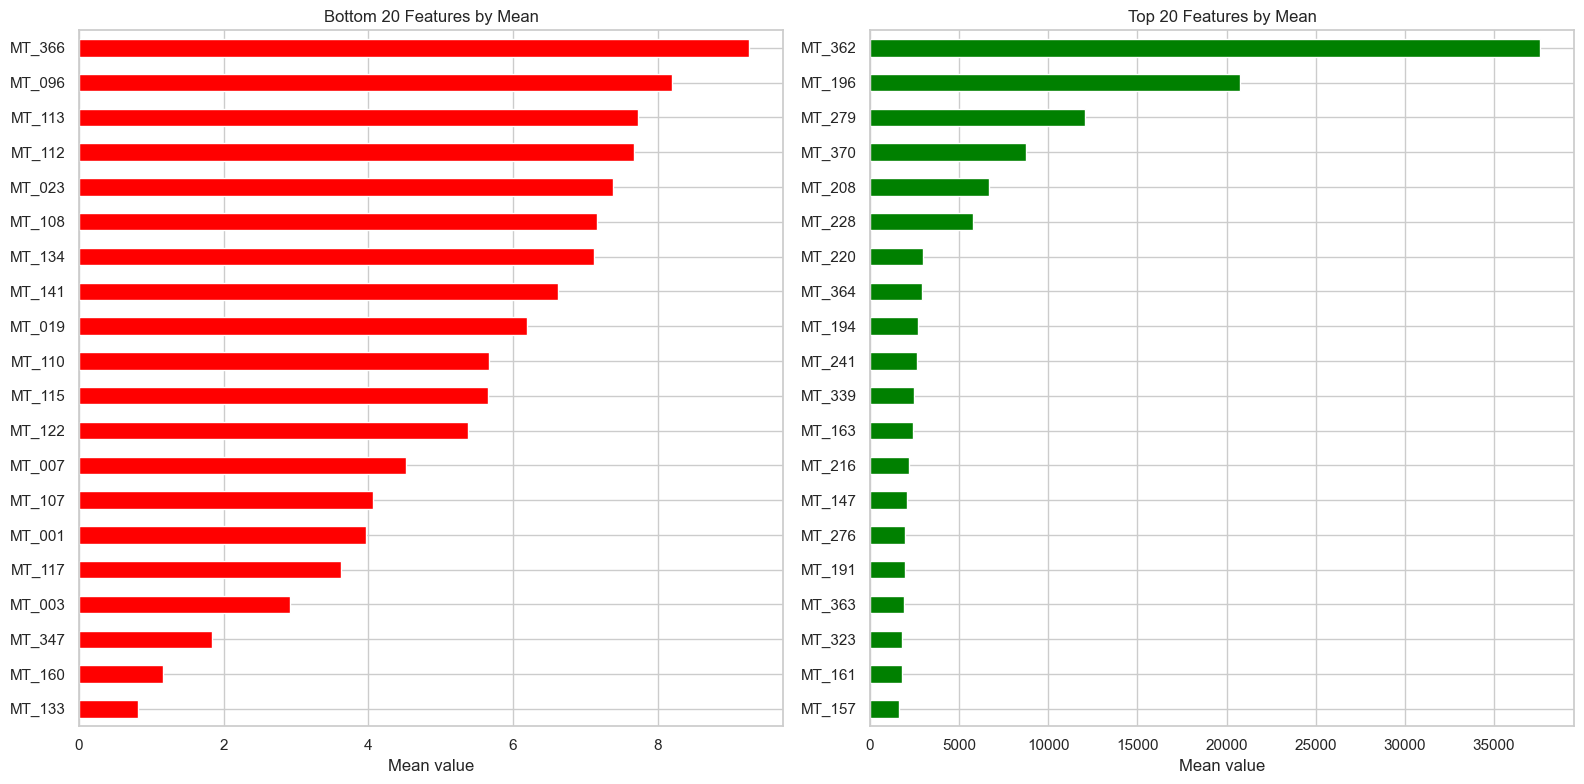

In [125]:
# Ensure correct ordering
means_sorted = means.sort_values(ascending=True)

top_n = 20
bottom_features = means_sorted.head(top_n)   # smallest means
top_features = means_sorted.tail(top_n)      # largest means

top_features = top_features.sort_values()
bottom_features = bottom_features.sort_values()

# Sort means explicitly
means_sorted = means.sort_values(ascending=True)

top_n = 20
bottom_features = means_sorted.head(top_n)
top_features = means_sorted.tail(top_n)

# Sort for nicer barh ordering
bottom_features = bottom_features.sort_values()
top_features = top_features.sort_values()

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Bottom 20
bottom_features.plot(kind='barh', ax=axes[0], color='red')
axes[0].set_title(f"Bottom {top_n} Features by Mean")
axes[0].set_xlabel("Mean value")

# Top 20
top_features.plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title(f"Top {top_n} Features by Mean")
axes[1].set_xlabel("Mean value")

plt.tight_layout()
plt.show()

Analysis:

1. **Asymmetry in Means**:

   * The **top 20 features** (green, right panel) have extremely high mean values, with the highest around **35,000–40,000**.
   * The **bottom 20 features** (red, left panel) are much smaller, mostly below **10**.
   * This suggests a **highly skewed distribution**, likely a few customers/meters dominate the overall consum extremes.

3. **Insights**:

   * The top features might represent heavy or high-usage meters, possibly outliers or industrial customers.
   * Bottom features could indicate low usage or less active meters, possibly residential or idu want me to do that?


### Distribution of Electricity Usage

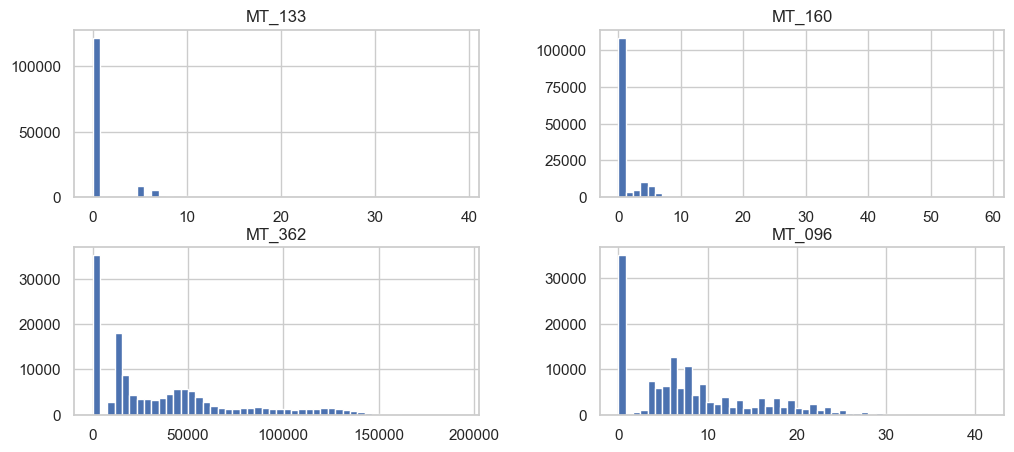

In [20]:
# Distribution of bottom 2 metres with top 2 metres
df[['MT_133','MT_160','MT_362','MT_096']].hist(bins=50);

The distributional analysis reveals two distinct consumption regimes.

MT_133 and MT_160 show highly concentrated low-usage patterns, while MT_362 and MT_096 exhibit heavy-tailed, high-variance behavior.

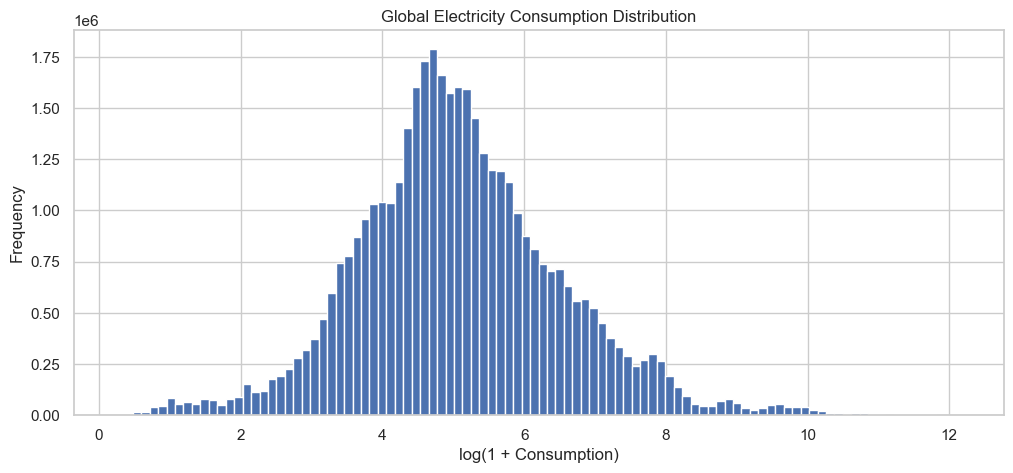

In [22]:
# Checking the distribution of the whole dataset
values = df.values.flatten()
values = values[values > 0]   # remove zeros if needed

plt.hist(np.log1p(values), bins=100)
plt.xlabel("log(1 + Consumption)")
plt.ylabel("Frequency")
plt.title("Global Electricity Consumption Distribution")
plt.show()


**Model Selection Justification**

We are justified in using a single global model because:

- The population does not exhibit clear multimodality after log transformation.
- Differences between low-, medium-, and high-consumption users form a continuous spectrum rather than discrete groups.
- Applying clustering would introduce artificial segmentation not supported by the underlying data distribution.

As shown in the global distribution analysis:

> *Log transformation removes scale-induced multimodality, supporting global modeling while allowing meter-levl effects.*
subgroups.*


### Time Patterns

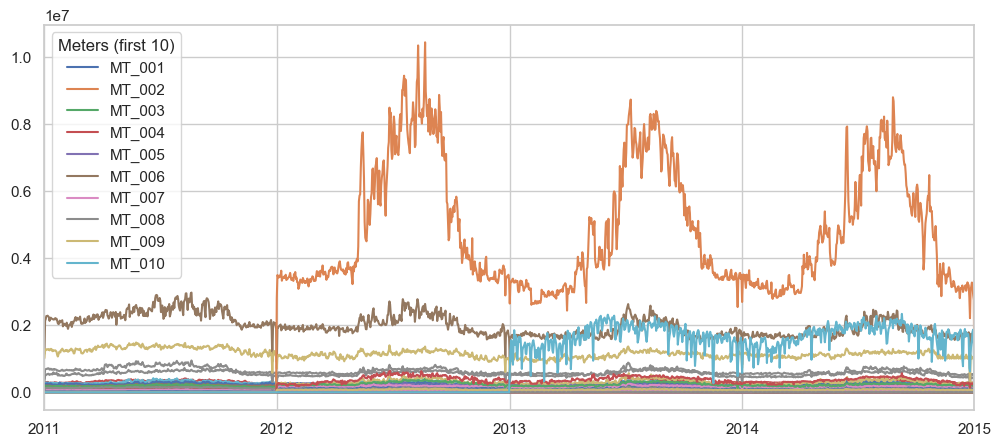

In [25]:
# Total electricity consumption per day across time
ax = df.resample('D').sum().plot()
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[:10], labels[:10], title="Meters (first 10)");

**Key Patterns Observed:**

The time-series plot highlights substantial heterogeneity in electricity consumption levels and seasonal amplitude across meters(likely summer/winter). While absolute magnitudes differ, all series exhibit consistent temporal structure characterized by annual seasonality and recurring demand cycles. These differences primarily reflect scale rather than fundamentally distinct consumption regimes.

**Decision implication:**

This motivates normalization or transformation rather than segmentation.

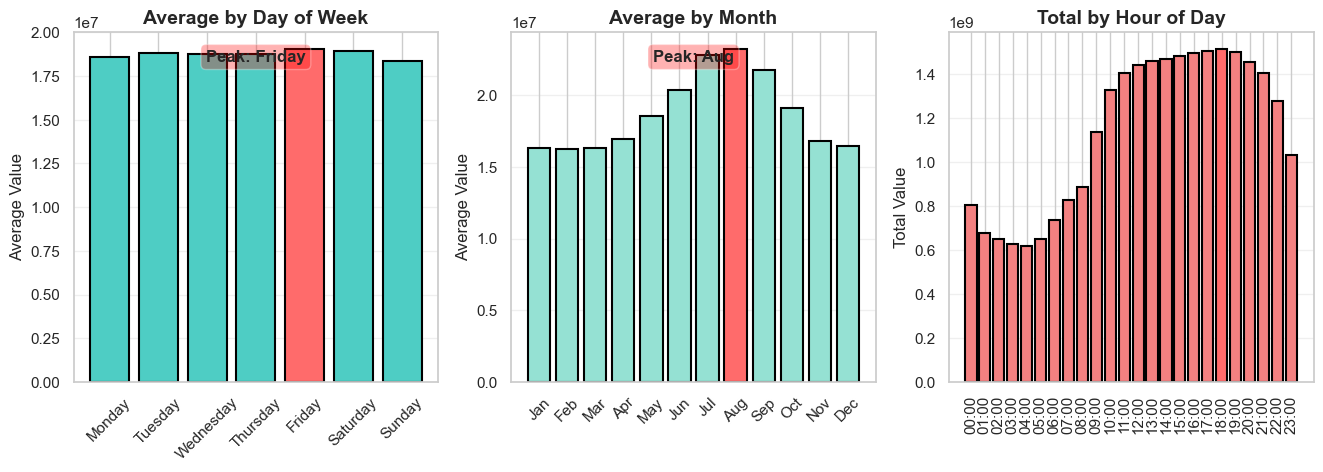

In [27]:
# Prepare the data
daily_data = df.resample('D').sum().sum(axis=1)

# Extract time components
day_of_week = daily_data.groupby(daily_data.index.dayofweek).mean()
month_of_year = daily_data.groupby(daily_data.index.month).mean()
hour_of_day = df.groupby(df.index.hour).sum().sum(axis=1) if hasattr(df.index, 'hour') else None

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# 1. Day of Week Pattern
ax1 = plt.subplot(2, 3, 1)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['#FF6B6B' if val == day_of_week.max() else '#4ECDC4' for val in day_of_week.values]
bars1 = ax1.bar(days, day_of_week.values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Average by Day of Week', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Value')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
peak_day_name = days[day_of_week.idxmax()]
ax1.text(0.5, 0.95, f'Peak: {peak_day_name}', transform=ax1.transAxes, 
         ha='center', va='top', fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# 2. Month of Year Pattern
ax2 = plt.subplot(2, 3, 2)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['#FF6B6B' if val == month_of_year.max() else '#95E1D3' for val in month_of_year.values]
bars2 = ax2.bar(months, month_of_year.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Average by Month', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Value')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
peak_month_name = months[month_of_year.idxmax() - 1]
ax2.text(0.5, 0.95, f'Peak: {peak_month_name}', transform=ax2.transAxes, 
         ha='center', va='top', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# 3. Hour of Day Pattern (if hourly data exists)
ax3 = plt.subplot(2, 3, 3)
if hour_of_day is not None and len(hour_of_day) > 1:
    hours = [f'{h:02d}:00' for h in hour_of_day.index]
    colors = ['#FF6B6B' if val == hour_of_day.max() else '#F38181' for val in hour_of_day.values]
    bars3 = ax3.bar(hours, hour_of_day.values, color=colors, edgecolor='black', linewidth=1.5)
    ax3.set_title('Total by Hour of Day', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Total Value')
    ax3.tick_params(axis='x', rotation=90)
    ax3.grid(True, alpha=0.3, axis='y')
    peak_hour = f'{hour_of_day.idxmax():02d}:00'
    ax3.text

**Deduction on daily pattern**

Average load is fairly flat Monday–Thursday, with a noticeable maximum on Friday, suggesting increased end‑of‑week activity or commercial usage. 

Weekend days show slightly lower averages, consistent with reduced industrial or office dema

**Deduction on monthly pattern**
nDemand gradually rises from winter and spring, reaching a clear maximum in August, then declines toward December. 


This seasonal shape suggests strong summer effects, likely driven by cooling needs or tourism‑related consumption in Portuga

**Deduction on hourly pattern**

Demand is lowest around 02:00–05:00, rises sharply after morning hours, and peaks between roughly 16:00 and 19:00 before slightly declining at night. 

This intraday profile is typical of residential and commercial usage, with higher activity and appliance use in late afternoon and early even.

**Possible outstanding insights**

Combination of Friday, August, and evening‑peak suggests planning for summer Friday evenings as the system’s most stressed periods.


>*

Note that there are structural quirks in the dataset (e.g., daylight‑saving transitions) that may slightly affect hourly aggregates and should be considered in further modeli*ng.ingl.
d.


### Correlation Between Meters

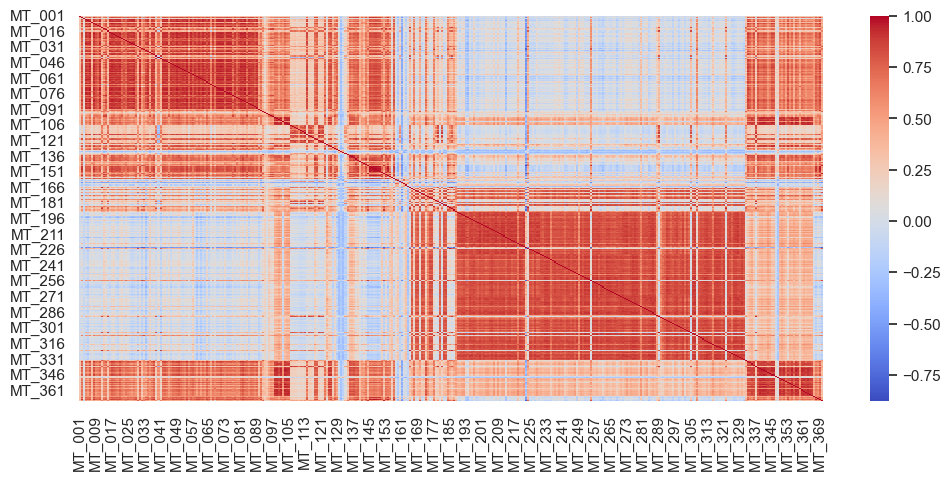

In [30]:
sns.heatmap(df.corr(), cmap="coolwarm");

The heatmap reveals distinct clusters of meters with high internal correlation, indicating groups of meters with similar usage patterns. Some meters show weak or negative correlation with others, suggesting unique or anomalous behavior. These insights can guide feature reduction, clustering, or further investigation of unusual patterns.

Are there distinct groups of meters with similar consumption behavior?

### Clustering / Pattern Discovery

In [34]:
# Ensure no missing values (KMeans cannot handle NaNs)
assert df.isnull().sum().sum() == 0, "Dataset contains missing values"

# Shape check
print("Original shape (time x meters):", df.shape)
print("Transposed shape (meters x time):", df.T.shape)

Original shape (time x meters): (140256, 370)
Transposed shape (meters x time): (370, 140256)


In [35]:
# Scaling to check on patterns
scaler = StandardScaler()
X = df.T  

X_scaled = scaler.fit_transform(X)

In [36]:
# Dimensionality reduction (mandatory for stability)
# PCA removes noise and redundancy

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_.sum())

Explained variance: 0.9981490888188538


**Deduction:**
Metres behave very similarly overall

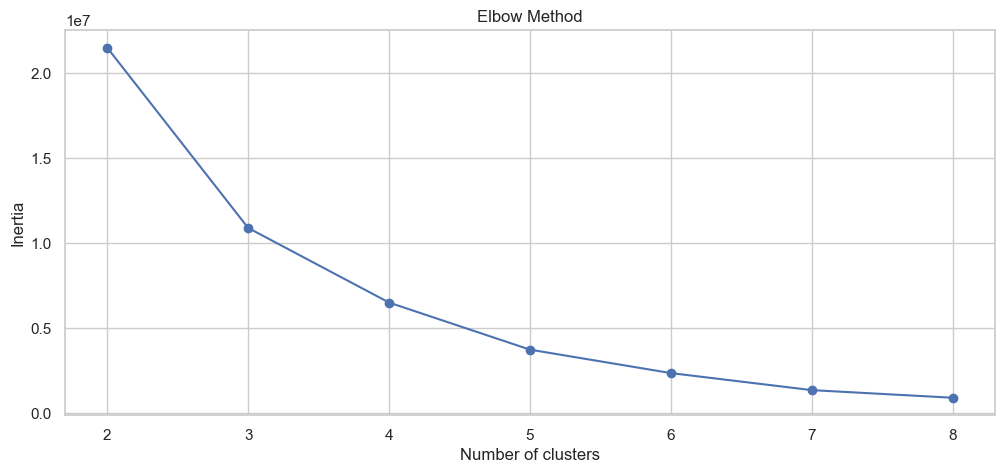

In [38]:
# Find the optimal number of clusters (Elbow Method)
inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [39]:
# Fitting KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

pd.Series(labels).value_counts()

0    367
2      2
1      1
Name: count, dtype: int64

In [42]:
# Create a clustering table for all of the rows statistics
# cluster_profiles = df.T.groupby(labels).mean()
# cluster_profiles

In [43]:
summary = pd.DataFrame({
    "mean_usage": df.T.groupby(labels).mean().mean(axis=1),
    "std_usage": df.T.groupby(labels).std().mean(axis=1),
    "max_usage": df.T.groupby(labels).max().mean(axis=1)
})

summary

,mean_usage,std_usage,max_usage
0,341.051316,927.055209,12296.179330
1,37607.987537,NaN,37607.987537
2,16391.561053,6174.509108,20757.598314


`Cluster 0` — Normal / Typical Households

Lowest mean usage

Low-to-moderate variability

Contains the vast majority of meters

This cluster represents typical residential electricity consumption with stable usage patterns.

`Cluster 1` 

Extremely high mean and max usage

Only one meter

Variance undefined → singleton cluster

This meter exhibits consumption behavior far outside the norm, potentially indicating industrial use, faulty metering, or data issues.

`Cluster 2` — High-Usage / Volatile Consumers

Mean usage ~50× higher than Cluster 0

Very high variability

Small number of meters

These meters show consistently high and volatile consumption, likely representing heavy users or atypical households.

> Due to the high temporal resolution of the dataset, cluster behavior was analyzed using aggregated statistics. 

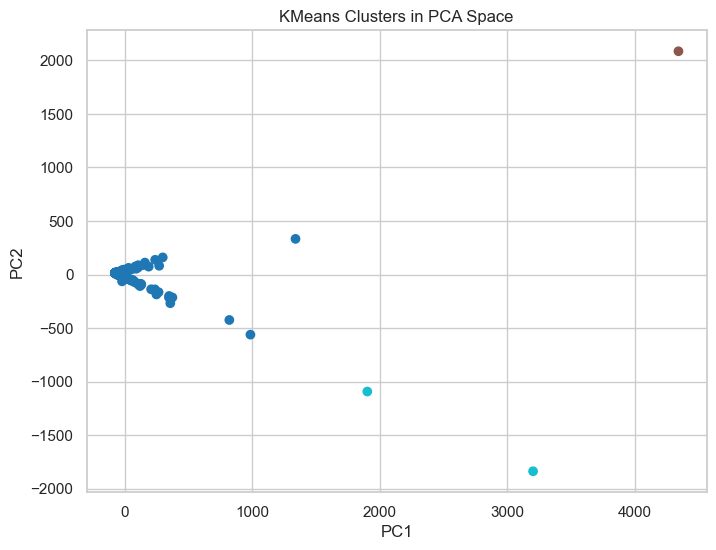

In [45]:
# Visualize clusters in PCA space

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters in PCA Space")
plt.show()

After log transformation and PCA, the electricity consumption profiles form a single dense manifold with no evidence of intrinsic multimodality. Apparent KMeans clusters are driven by a small number of extreme outliers rather than distinct customer segments, indicating that clustering would be artificial rather than data-driven.

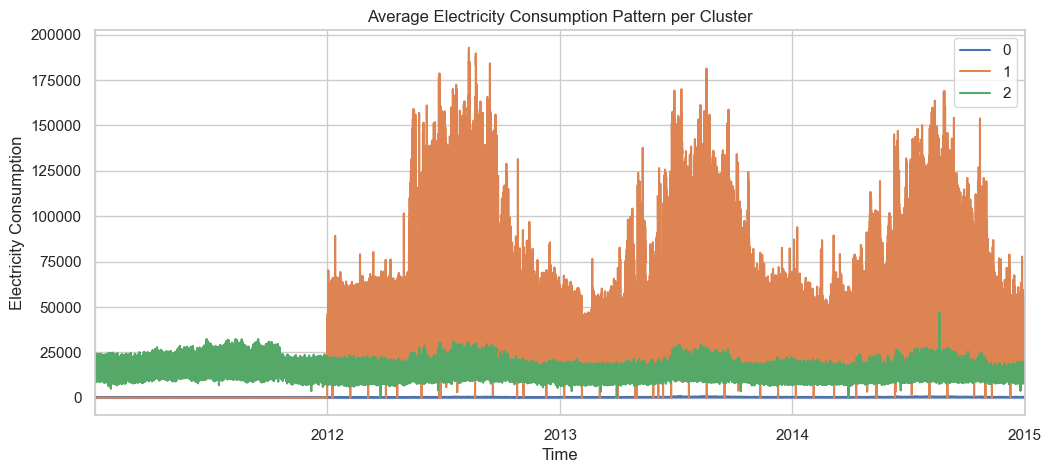

In [47]:
# Average load profile per cluster

cluster_profiles = df.T.groupby(labels).mean()

# Visualize cluster behavior
cluster_profiles.T.plot(
    title="Average Electricity Consumption Pattern per Cluster",
    figsize=(12, 5)
)

plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.show()

Most households behave very similarly in shape of consumption over time.

Only 3 meters behave very differently enough to be separated.

This is actually common in electricity datasets.

PCA showed that nearly all variance in electricity consumption is shared across meters, indicating highly homogeneous usage patterns. Clustering therefore revealed a dominant normal behavior and a small set of anomalous meters, which we reframe as an anomaly detection problem rather than forced segmentation.

There are no meaningful behavioral segments, only normal users + anomalies.

## DATA PREPARATION

### Data Cleaning and Transformation

#### Creating timestamp column

Since the dataset consists of fixed-interval measurements without an explicit timestamp column, timestamps are reconstructed using the known sampling frequency to enable proper time-series analysis.

In [55]:
# Rename the index
df.index.name = 'timestamp'

# Quick Check
print(df.shape)
print(df.head())

(140256, 370)
                     MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  MT_011  MT_012  MT_013  MT_014  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0  

In [56]:
df = df.reset_index()  # timestamp becomes a regular column
df.head()

,timestamp,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.770335,0.0,0.0,0.0,0.0,0.0,0.0,260.416667,45.721750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.203369,0.0,38.342246,20.363985,0.0,1935.185185,158.006363,1965.437788,0.0,0.0,838.461538,0.0,50.756208,24.570605,0.0,137.885196,80.797011,0.0,74.562212,76.792763,41.482587,0.0,0.0,0.0,93.291732,0.0,39.588859,45.717456,0.0,0.0,0.0,13.422819,22.123746,205.835962,327.859238,920.863309,285.607755,266.521027,1826.271186,218.274112,12166.666667,76.612903,148.867314,272.935780,428.414097,173.089071,235.492958,319.354839,447.761194,288.135593,110.538373,345.578231,4235.294118,260.93750,472.868217,84.0,232.558140,603.036876,199.592668,207.532051,1328.903654,113.074205,680.529301,204.301075,1278.481013,81.728267,444.000000,517.333333,0.0,189.121951,325.833980,228.249744,3263.157895,582.689335,62.219731,380.410959,58.148148,84.924782,38

#### Conversion from Wide to Long format (Melting)

In [58]:
meter_columns = [c for c in df.columns if c != "timestamp"]

df_long = df.melt(
    id_vars="timestamp",
    value_vars=meter_columns,
    var_name="meter_id",
    value_name="consumption_kwh"
)

print(df_long.shape)
df_long.head()

(51894720, 3)


,timestamp,meter_id,consumption_kwh
0,2011-01-01 00:15:00,MT_001,0.0
1,2011-01-01 00:30:00,MT_001,0.0
2,2011-01-01 00:45:00,MT_001,0.0
3,2011-01-01 01:00:00,MT_001,0.0
4,2011-01-01 01:15:00,MT_001,0.0


#### Count negative values

In [60]:
num_negative = (df_long["consumption_kwh"] < 0).sum()
print(f"Number of negative values: {num_negative}")

Number of negative values: 0


#### Remove dead meters (all-zero meters)

In [62]:
meter_totals = df_long.groupby("meter_id")["consumption_kwh"].sum()
active_meters = meter_totals[meter_totals > 0].index

df_long = df_long[df_long["meter_id"].isin(active_meters)]

print(f"Active meters: {df_long['meter_id'].nunique()}")

Active meters: 370


#### Sanity Check

In [64]:
print(df_long["timestamp"].min(), df_long["timestamp"].max())
print(df_long.groupby("meter_id").size().describe())

2011-01-01 00:15:00 2015-01-01 00:00:00
count       370.0
mean     140256.0
std           0.0
min      140256.0
25%      140256.0
50%      140256.0
75%      140256.0
max      140256.0
dtype: float64


`Interpretation`

Data spans exactly 4 years, starting at 2011-01-01 00:15:00 and ending at 2015-01-01 00:00:00.
Every meter has exactly 140,256 rows.

std = 0 confirms there is no variation, i.e., all meters have complete data.

We don’t have missing timestamps for any meter.

We also don’t have “dead” meters—each meter recorded data for the entire period.

This is why our earlier check returned 370 active meters; all are active.

#### Create daily aggregates

In [67]:
df_long["date"] = df_long["timestamp"].dt.date
df_long["day_of_week"] = df_long["timestamp"].dt.dayofweek
df_long["is_weekend"] = df_long["day_of_week"].isin([5, 6]).astype(int)

daily_df = (
    df_long
    .groupby(["meter_id", "date"])
    .agg(
        daily_total=("consumption_kwh", "sum"),
        daily_mean=("consumption_kwh", "mean"),
        daily_std=("consumption_kwh", "std"),
        daily_min=("consumption_kwh", "min"),
        daily_max=("consumption_kwh", "max"),
        is_weekend=("is_weekend", "first"),
        day_of_week=("day_of_week", "first")
    )
    .reset_index()
)

daily_df["daily_std"] = daily_df["daily_std"].fillna(0)

print(daily_df.shape)
daily_df.head()

(540940, 9)


,meter_id,date,daily_total,daily_mean,daily_std,daily_min,daily_max,is_weekend,day_of_week
0,MT_001,2011-01-01,0.0,0.0,0.0,0.0,0.0,1,5
1,MT_001,2011-01-02,0.0,0.0,0.0,0.0,0.0,1,6
2,MT_001,2011-01-03,0.0,0.0,0.0,0.0,0.0,0,0
3,MT_001,2011-01-04,0.0,0.0,0.0,0.0,0.0,0,1
4,MT_001,2011-01-05,0.0,0.0,0.0,0.0,0.0,0,2


We have 540,940 rows and 9 columns.

Since we have 370 meters, this means on average:

540
,
940
/
370
≈
1
,
462
 days per meter

That makes sense because your data spans 4 years (~1,461 days including leap year adjustments).

In [69]:
# Testing the above conclusion
mt001 = daily_df[daily_df["meter_id"] == "MT_001"]
print(f"Rows for MT_001: {len(mt001)}")

Rows for MT_001: 1462


#### Save Processed Data

In [71]:
os.makedirs("data/processed", exist_ok=True)

daily_df.to_csv("data/processed/daily_consumption.csv", index=False)
print("Saved daily_consumption.csv")

Saved daily_consumption.csv


### Synthetic Theft Injection

In [73]:
# Select random customers for theft based on IEEE-defined patterns
theft_percentage = 0.05  # 5% of all customers
customers = daily_df['meter_id'].unique()
n_theft_customers = int(len(customers) * theft_percentage)

# Randomly pick customers
theft_customers = np.random.choice(customers, size=n_theft_customers, replace=False)
print(f"Selected {len(theft_customers)} customers for theft injection")

Selected 18 customers for theft injection


In [74]:
# Print the list of selected customers
print("Selected customers for theft injection:")
print(theft_customers)

Selected customers for theft injection:
['MT_260' 'MT_237' 'MT_231' 'MT_147' 'MT_273' 'MT_073' 'MT_175' 'MT_004'
 'MT_270' 'MT_306' 'MT_078' 'MT_367' 'MT_034' 'MT_233' 'MT_356' 'MT_309'
 'MT_361' 'MT_089']


The cell below injects realistic customer-level electricity theft by modifying historical consumption according to distinct real-world fraud behaviors, thereby enabling supervised learning under controlled and interpretable conditions.

In [131]:
# Initialize theft column
daily_df['is_theft'] = 0

# To keep track of what pattern we applied to each customer
theft_patterns = {}

# Loop through customers and inject theft
for customer in theft_customers:
    
    # Randomly pick a theft pattern based on IEEE research probabilities
    pattern_type = np.random.choice(
        ['meter_tampering', 'cable_bypass', 'partial_bypass', 'time_based', 'gradual'],
        p=[0.35, 0.25, 0.20, 0.15, 0.05]
    )
        # So for each customer:
            # There is a 35% chance they get meter tampering
            # A 25% chance of cable bypass
            # A 20% chance of partial bypass
            # A 15% chance of time-based theft
            # A 5% chance of gradual theft
    
    # Get customer's data
    mask = daily_df['meter_id'] == customer
    customer_data = daily_df[mask].copy()

    # Applying the chosen theft patterns
    # Pattern 1: Meter Tampering - Manipulates electricity meter so that it records only a fraction of the actual consumption.
    if pattern_type == 'meter_tampering':
        reduction_factor = np.random.uniform(0.4, 0.8)  # reduce 40-80%
        theft_days = np.random.random(len(customer_data)) < 0.7  # affect about 70% of days
        noise = np.random.normal(0, 0.05, sum(theft_days))  # small random noise
        customer_data.loc[theft_days, 'daily_total'] *= (1 - reduction_factor) # Update daily total
        customer_data.loc[theft_days, 'daily_total'] *= (1 + noise) # Add some noise
    
    # Pattern 2: Cable Bypass - Connects appliances directly to the power line, completely bypassing the meter.
    elif pattern_type == 'cable_bypass':
        n_periods = np.random.randint(2, 5)
        period_lengths = np.random.randint(5, 15, n_periods) 
        start_idx = 0
        for period_len in period_lengths:
            if start_idx + period_len < len(customer_data):
                customer_data.iloc[start_idx:start_idx+period_len, 
                                   customer_data.columns.get_loc('daily_total')] = 0
                start_idx += period_len + np.random.randint(10, 30)
    
    # Pattern 3: Partial Bypass - Only part of the household load bypasses the meter
    elif pattern_type == 'partial_bypass':
        threshold = np.percentile(customer_data['daily_total'], 30)
        high_days = customer_data['daily_total'] > threshold
        variation = np.random.uniform(-0.1, 0.1, sum(high_days))
        customer_data.loc[high_days, 'daily_total'] = threshold * (1 + variation)
    
    # Pattern 4: Time-Based Theft - Theft occurs only during specific time periods when inspection is unlikely e.g holidays
    elif pattern_type == 'time_based':
        if np.random.random() < 0.5:
            theft_days = customer_data['day_of_week'].isin([5, 6])  # weekends
        else:
            theft_days = customer_data['day_of_week'].isin([0, 1, 2, 3, 4])  # weekdays
        customer_data.loc[theft_days, 'daily_total'] *= 0.4  # 60% reduction
    
    # Pattern 5: Gradual Theft - Slowl increases of theft over time to test detection thresholds, avoid sudden anomalies
    elif pattern_type == 'gradual':
        n_days = len(customer_data)
        reduction_factors = np.linspace(0, 0.7, n_days)
        customer_data['daily_total'] *= (1 - reduction_factors)

    # Recompute derived daily statistics for consistency over a rolling window (e.g., last 7 or 30 days)
    customer_data['daily_mean'] = customer_data['daily_total'].rolling(30, min_periods=1).mean()
    customer_data['daily_std']  = customer_data['daily_total'].rolling(30, min_periods=1).std().fillna(0)
    customer_data['daily_min']  = customer_data['daily_total'].rolling(30, min_periods=1).min()
    customer_data['daily_max']  = customer_data['daily_total'].rolling(30, min_periods=1).max()
    
    # Write back modified data
    daily_df.loc[mask, 'daily_total'] = customer_data['daily_total']
    daily_df.loc[mask, 'daily_mean']  = customer_data['daily_mean']
    daily_df.loc[mask, 'daily_std']   = customer_data['daily_std']
    daily_df.loc[mask, 'daily_min']   = customer_data['daily_min']
    daily_df.loc[mask, 'daily_max']   = customer_data['daily_max']
    daily_df.loc[mask, 'is_theft']    = 1
    
    # Record pattern info
    theft_patterns[customer] = {
        'pattern': pattern_type,
        'start_date': customer_data['date'].min(),
        'end_date': customer_data['date'].max()
    }

# Summary
print(customer_data.head())
print(f"\nTheft injection complete: {daily_df['is_theft'].sum()} theft records")
print(f"\nClass distribution:\n{daily_df['is_theft'].value_counts()}")

       meter_id        date  daily_total  daily_mean  daily_std  daily_min  \
128656   MT_089  2011-01-01          0.0         0.0        0.0        0.0   
128657   MT_089  2011-01-02          0.0         0.0        0.0        0.0   
128658   MT_089  2011-01-03          0.0         0.0        0.0        0.0   
128659   MT_089  2011-01-04          0.0         0.0        0.0        0.0   
128660   MT_089  2011-01-05          0.0         0.0        0.0        0.0   

        daily_max  is_weekend  day_of_week  is_theft  
128656        0.0           1            5         0  
128657        0.0           1            6         0  
128658        0.0           0            0         0  
128659        0.0           0            1         0  
128660        0.0           0            2         0  

Theft injection complete: 26316 theft records

Class distribution:
is_theft
0    514624
1     26316
Name: count, dtype: int64


In [129]:
print("Class distribution:")
print(daily_df['is_theft'].value_counts(normalize=True))

Class distribution:
is_theft
0    0.951351
1    0.048649
Name: proportion, dtype: float64


In [233]:
# Pick one customer from the theft list to test
theft_customer = theft_customers[0]  # first customer in the list

# Filter the main dataframe for that customer
customer_data = daily_df[daily_df['meter_id'] == theft_customer].sort_values('date')

# Inspect the first few rows
print(customer_data.head())

       meter_id       date   daily_total    daily_mean    daily_std  \
378658   MT_260 2011-01-01   3472.036571   3472.036571     0.000000   
378659   MT_260 2011-01-02   7804.932571   5638.484571  3063.820144   
378660   MT_260 2011-01-03  14181.587485   8486.185542  5387.179169   
378661   MT_260 2011-01-04  13401.930072   9715.121675  5038.743461   
378662   MT_260 2011-01-05  12453.103211  10262.717982  4532.219140   

          daily_min     daily_max  is_weekend  day_of_week  is_theft  
378658  3472.036571   3472.036571           1            5         1  
378659  3472.036571   7804.932571           1            6         1  
378660  3472.036571  14181.587485           0            0         1  
378661  3472.036571  14181.587485           0            1         1  
378662  3472.036571  14181.587485           0            2         1  


### Feature Engineering

#### Benford's Law

`Benford Law Analysis of Electricity Consumption`

Benford’s Law is about the distribution of the first digit in naturally occurring numerical data. It says that in many real-world datasets (financial data, populations, electricity usage, etc.), the smaller digits appear as the first digit more frequently than larger digits.

When you want to check if a dataset follows Benford’s Law, you compare the observed frequency of each first digit in your data to the expected frequency given by Benford.

`A common metric is the chi-square statistic`:

**Benford’s Law predicts first-digit distribution, and the chi-square deviation measures how far your data is from this prediction.**

**Objective:**  - Identify meters whose consumption patterns deviate strongly from expected natural distributions, which could indicate anomalies or possible theft.

In [292]:
# Safe divide helper
# Important when dealing with scaled or normalized features, where a zero denominator could break the pipeline

def safe_divide(numerator, denominator, eps=1e-5): # A tiny value added to the denominator to prevent division by zero, default is 1e-5
    return numerator / (denominator + eps)

# Benford Law violation

def calculate_benford_violation(series):
    
    """Compute chi-square deviation from Benford's Law for first digits."""
    
    positive = series[series > 0] # Ignoring negative values
    if len(positive) == 0: # If there are no positive numbers, return 0
        return 0
        
    # Convert each positive value to a string and extract the first character, then convert back to integer.
    first_digits = positive.astype(str).str[0].astype(int)
    
    # Compute the expected distribution of first digits according to Benford's Law
    expected = np.log10(1 + 1/np.arange(1, 10))
    
    # Gives higher probability to small digits (1 appears most frequently).
    observed = first_digits.value_counts(normalize=True).reindex(range(1, 10), fill_value=0)

    # Convert proportions to actual counts for the chi-square calculation.
    obs_actual = observed * len(positive)
    expected_actual = expected * len(positive)

    # Compute the chi-square statistic:
    chi2 = np.sum((obs_actual - expected_actual)**2 / (expected_actual + 1e-10))
    return chi2

In [294]:
# Rolling statistics - calculated over a moving window of past observations rather than over the entire dataset.

def rolling_features(group, window_sizes=[7, 30, 90]):
    
    """Compute rolling z-scores, percent change, and volatility without data leakage."""
    
    features = {} # An empty dictionary to store all rolling features
    for w in window_sizes:     # Loop through each window size (e.g., 7, 30, 90 days)
        if len(group) >= w:    # Only calculate if we have enough historical data
            
            # exclude last day for rolling calculation to avoid data leakage
            window_vals = group['daily_total'].iloc[-w:-1]
            window_mean = window_vals.mean()
            window_std = window_vals.std()

            # This is the most recent day’s consumption.
            current_val = group['daily_total'].iloc[-1]

            features[f'z_score_{w}d'] = safe_divide(current_val - window_mean, window_std) # Z-score: (current - mean) / std
                                                                # Shows how abnormal today is relative to recent history
            features[f'pct_change_{w}d'] = safe_divide(current_val - window_mean, window_mean) # Percent change: relative difference from recent average.
                                                                # Highlights large spikes or drops
            features[f'volatility_{w}d'] = safe_divide(window_std, window_mean) # Volatility: variability relative to the mean.
                                                                # High value → consumption is erratic; low → stable.
    return features

Electricity theft is often; Sudden (drop or spike), Relative to recent behavior, not lifetime behavior.

Rolling statistics let you detect:

“Today looks abnormal compared to my own last 30 days”

Not “today looks different from the average customer”

That makes them customer-specific anomaly detectors.

In [297]:
# Outliers & sudden changes
# It answers questions like:
    # 1. Does this customer have unusually high or low days?
    # 2. Do they suddenly drop or spike consumption?
    # 3. Are these changes rare compared to their own history?

def outlier_features(group):
    """Compute IQR outliers, max daily drop/spike, sudden drop/spike counts."""
    features = {}
    q1, q3 = group['daily_total'].quantile([0.25, 0.75])
    iqr = q3 - q1
    features['iqr_outlier_count'] = ((group['daily_total'] < (q1 - 1.5*iqr)) |
                                     (group['daily_total'] > (q3 + 1.5*iqr))).sum()

    pct_change = group['daily_total'].pct_change() # This captures day-to-day shocks, not absolute levels.
    features['max_daily_drop'] = pct_change.min() # biggest single-day fall in consumption
    features['max_daily_spike'] = pct_change.max() # biggest single-day jump
    features['sudden_drop_count'] = (pct_change < pct_change.quantile(0.05)).sum() # Finds the most extreme 5% of changes
    features['sudden_spike_count'] = (pct_change > pct_change.quantile(0.95)).sum() # Counts how often they happen
    return features

`What this detects;`

Days that are too low or too high compared to the customer’s own behavior

`Why this matters for theft:`

Bypassing or partial shunting → unusually low days

Tampering or reconnection → sudden high days

Repeated outliers = suspicious behavior

This gives a count

`Why percentiles (not fixed numbers)?` Because:

Industrial users ≠ residential users

Absolute thresholds don’t generalize

Percentiles capture relative abnormality

`Feature	Detects`

iqr_outlier_count -> Abnormal levels

max_daily_drop/spike -> One-off events

sudden_*_count -> Repeated suspicious behavior

Together, they distinguish: Random noise, Seasonal changes, Intentional manipulation

In [300]:
# Autocorrelation
# measures how similar a time series is to itself after a time shift (lag).
def autocorr_features(group):
    """Compute weekly and monthly autocorrelations."""
    
    autocorr7 = group['daily_total'].autocorr(lag=7)
    autocorr30 = group['daily_total'].autocorr(lag=30)
    return {
        'autocorr_weekly': 0 if pd.isna(autocorr7) else autocorr7,
        'autocorr_monthly': 0 if pd.isna(autocorr30) else autocorr30
    }

>“If I know today’s consumption, can I predict consumption 7 or 30 days ago?”

High autocorrelation → stable, habitual behavior

Low or negative autocorrelation → disrupted or manipulated behavior

In [303]:
# Entropy - measures unpredictability or disorder.
# How random does this customer’s electricity usage look?

def entropy_feature(group):
    """Compute consumption entropy."""
    hist, _ = np.histogram(group['daily_total'], bins='fd') # 'fd' (Freedman–Diaconis rule) -Automatically chooses bin width based on:
                                                                    # Data variability (IQR), Sample size
    probs = hist / hist.sum() if hist.sum() > 0 else np.zeros_like(hist) # Convert counts into probabilities
    return {'consumption_entropy': entropy(probs)}


Low entropy → predictable, regular behavior

High entropy → irregular, chaotic behavior

In [306]:
# Seasonality
def seasonality_feature(group):
    """Compute monthly seasonality strength."""
    if len(group) >= 365: # Only calculate seasonality if we have at least one year of daily data.
        monthly_avg = group.groupby(group['date'].dt.month)['daily_total'].mean()
        return {'seasonality_strength': safe_divide(monthly_avg.std(), group['daily_total'].std())}
    else:
        return {'seasonality_strength': 0} # If less than 365 days → feature = 0


Seasonality strength measures how strongly a customer’s electricity usage follows a regular monthly pattern. Disruptions, irregularities, or theft reduce this feature.

In [309]:
# Cumulative deviation - measures how the most recent daily consumption differs from the customer’s average so far.

def cumulative_deviation(group):
    """Deviation of last value from cumulative mean."""
    current_val = group['daily_total'].iloc[-1] # Focuses only on the last recorded daily consumption.
    cum_mean = group['daily_total'].expanding().mean()
    return {'cum_dev_last': current_val - cum_mean.iloc[-1]}

#### Feature Creation

**Main Feature Engineering Pipeline**

This function generates a comprehensive set of features for each electricity meter.

Features are grouped to capture different aspects of consumption behavior:

1. Basic Statistics      → overall usage, variability, peaks, troughs, weekday/weekend patterns
2. Rolling Statistics    → short- and medium-term context (7, 30, 90 days), including z-scores, pct changes, and volatility
3. Outliers & Sudden Changes → violations of typical patterns, extreme drops/spikes
4. Benford Law Violation → detects irregular first-digit distributions (potential fraud indicator)
5. Autocorrelation       → pattern consistency across weekly/monthly lags
6. Entropy               → randomness or disorder in consumption
7. Seasonality           → monthly seasonal patterns strength
8. Cumulative Deviation  → deviation of the last value from the historical mean

>All numeric features are scaled and clipped to avoid extreme values.

In [313]:
# Main feature creation

def create_features(df, min_history=30, rolling_windows=[7,30,90]):
    """Generate all features for each meter_id."""
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date', 'daily_total']).copy()
    df['month'] = df['date'].dt.month

    features_list = []

    for meter_id, group in df.groupby('meter_id'):
        group = group.sort_values('date').reset_index(drop=True)
        if len(group) < min_history:
            continue

        feat = {'meter_id': meter_id}

        # Basic stats
        mean_total = group['daily_total'].mean()
        std_total = group['daily_total'].std()
        feat.update({
            'total_consumption': group['daily_total'].sum(),
            'avg_consumption': mean_total,
            'std_consumption': std_total,
            'cv_consumption': safe_divide(std_total, mean_total),
            'peak_to_avg_ratio': safe_divide(group['daily_total'].max(), mean_total),
            'trough_to_avg_ratio': safe_divide(group['daily_total'].min(), mean_total),
            'weekend_weekday_ratio': safe_divide(
                group[group['day_of_week']>=5]['daily_total'].mean(),
                group[group['day_of_week']<5]['daily_total'].mean()
            )
        })

        # Rolling stats
        feat.update(rolling_features(group, rolling_windows))

        # Outliers & sudden changes
        feat.update(outlier_features(group))

        # Benford violation
        feat['benford_violation'] = calculate_benford_violation(group['daily_total'])

        # Autocorrelation
        feat.update(autocorr_features(group))

        # Entropy
        feat.update(entropy_feature(group))

        # Seasonality
        feat.update(seasonality_feature(group))

        # Cumulative deviation
        feat.update(cumulative_deviation(group))

        # Theft flag
        if 'is_theft' in group.columns:
            feat['is_theft'] = group['is_theft'].max()

        features_list.append(feat)

    # Build DataFrame
    features_df = pd.DataFrame(features_list)

    # Scale numeric features
    numeric_cols = [c for c in features_df.columns
                    if c not in ['meter_id', 'is_theft'] and pd.api.types.is_numeric_dtype(features_df[c])]
    features_df[numeric_cols] = features_df[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(0)
    features_df[numeric_cols] = features_df[numeric_cols].clip(-1e6, 1e6)
    features_df[numeric_cols] = StandardScaler().fit_transform(features_df[numeric_cols])

    print(f"Feature engineering complete: {features_df.shape[0]} customers, {features_df.shape[1]} features")
    return features_df

In [317]:
# Load the data
df_with_theft = pd.read_csv('data/synthetic/consumption_with_theft.csv')

# Ensure 'day_of_week' exists if used in weekend_weekday_ratio
if 'day_of_week' not in df_with_theft.columns:
    df_with_theft['day_of_week'] = pd.to_datetime(df_with_theft['date']).dt.dayofweek

# Call feature creation
features_df = create_features(df_with_theft)

# Inspect the output
print(features_df.head())        # first few rows
print(features_df.shape)         # number of rows & features

# Optionally save to CSV
features_df.to_csv('data/processed/final_features.csv', index=False)

Feature engineering complete: 370 customers, 29 features
  meter_id  total_consumption  avg_consumption  std_consumption  \
0   MT_001          -8.235056        -0.353968        -0.219993   
1   MT_002           0.169091        -0.337299        -0.204821   
2   MT_003          -5.642381        -0.352380        -0.210402   
3   MT_004           0.169091        -0.285409        -0.156821   
4   MT_005           0.169091        -0.323382        -0.189973   

   cv_consumption  peak_to_avg_ratio  trough_to_avg_ratio  \
0        0.029563          -0.452893            -0.739103   
1        0.057069          -0.279015            -0.739103   
2        4.379356          10.180543            -0.739103   
3        0.072656          -0.221567            -0.739103   
4        0.148513          -0.192621            -0.739103   

   weekend_weekday_ratio  z_score_7d  pct_change_7d  volatility_7d  \
0              -0.022601   -0.666920      -0.227602      -1.032727   
1               0.174044    2.527

## Columns Explanation

#### **Customer identifier**

* **`meter_id`** → Unique ID for each electricity meter/customer.

---

#### **Basic consumption statistics**

* **`total_consumption`** → Sum of all daily consumption values for this meter.
* **`avg_consumption`** → Mean daily consumption.
* **`std_consumption`** → Standard deviation of daily consumption, measures variability.
* **`cv_consumption`** → Coefficient of variation = `std / mean`, shows relative variability.
* **`peak_to_avg_ratio`** → Maximum daily value divided by mean, indicates unusually high spikes.
* **`trough_to_avg_ratio`** → Minimum daily value divided by mean, shows unusually low dips.
* **`weekend_weekday_ratio`** → Average weekend consumption / average weekday consumption; captures consumption patterns across the week.

---

#### **Rolling statistics (context)**

* **`z_score_7d`, `z_score_30d`, `z_score_90d`** → Standardized deviation of the last day from the rolling mean over 7, 30, 90 days. Detects unusual recent behavior.
* **`pct_change_7d`, `pct_change_30d`, `pct_change_90d`** → Relative change of the last day compared to rolling mean.
* **`volatility_7d`, `volatility_30d`, `volatility_90d`** → Rolling standard deviation divided by rolling mean, shows variability over different time windows.

---

#### **Outliers / sudden changes (violations of pattern)**

* **`iqr_outlier_count`** → Number of days outside 1.5×IQR; flags extreme consumption.
* **`max_daily_drop` / `max_daily_spike`** → Largest percent drop/spike between consecutive days.
* **`sudden_drop_count` / `sudden_spike_count`** → Number of days with drops/spikes beyond 5th/95th percentile thresholds.

---

#### **Benford Law**

* **`benford_violation`** → Chi-square measure of how first digits deviate from Benford’s Law. Useful for detecting abnormal reporting or manipulation.

---

#### **Pattern consistency**

* **`autocorr_weekly`** → Correlation of daily consumption with a lag of 7 days (weekly). High values indicate consistent weekly patterns.
* **`autocorr_monthly`** → Correlation with a lag of 30 days (monthly patterns).

---

#### **Complex behavior / irregularity**

* **`consumption_entropy`** → Shannon entropy of daily values; higher means more randomness in consumption.
* **`seasonality_strength`** → Standard deviation of monthly averages divided by total standard deviation; captures recurring seasonal patterns.
* **`cum_dev_last`** → Deviation of last day from cumulative mean; detects trend shifts.

---

#### **Target label**

* **`is_theft`** → 1 if that customer has injected “theft” behavior, 0 otherwise.

---

#### **Notes**

* All numeric columns are **scaled**, so negative/positive values are relative to the mean and standard deviation of the dataset.
* Rolling statistics, outliers, autocorrelation, entropy, and seasonality features help capture **anomalous or suspicious consumption behaviors** that could indicate theft or other irregularities.

## MODEL TRAINING

In [332]:
class TheftDetectionModel:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {}
        self.best_model = None
        self.feature_importance = None
        
    def prepare_data(self, features_path):
        """
        Prepare train/test split with stratification
        """
        print("📊 Preparing data for modeling...")
        
        # Load features
        df = pd.read_csv(features_path)
        
        # Separate features and target
        X = df.drop(['meter_id', 'is_theft'], axis=1, errors='ignore')
        y = df['is_theft']
        
        # Handle missing values
        X = X.fillna(0)
        
        # Feature names
        feature_names = X.columns.tolist()
        
        # Train-test split with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, 
            test_size=0.2, 
            stratify=y,
            random_state=self.random_state
        )
        
        print(f"✅ Data prepared:")
        print(f"   Training: {X_train.shape[0]} samples ({y_train.mean()*100:.1f}% theft)")
        print(f"   Testing:  {X_test.shape[0]} samples ({y_test.mean()*100:.1f}% theft)")
        print(f"   Features: {X_train.shape[1]}")
        
        return X_train, X_test, y_train, y_test, feature_names
    
    def train_baseline_model(self, X_train, y_train):
        """
        Train Logistic Regression as baseline
        """
        print("\n🎯 Training Baseline Model (Logistic Regression)...")
        
        # Handle class imbalance
        model = LogisticRegression(
            class_weight='balanced',
            random_state=self.random_state,
            max_iter=1000
        )
        
        # Simple pipeline with SMOTE
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=self.random_state)),
            ('model', model)
        ])
        
        pipeline.fit(X_train, y_train)
        self.models['logistic'] = pipeline
        
        print("✅ Baseline model trained")
        return pipeline
    
    def train_random_forest(self, X_train, y_train):
        """
        Train Random Forest with feature importance
        """
        print("\n🌲 Training Random Forest...")
        
        # Optimized Random Forest
        rf_model = RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            class_weight='balanced_subsample',
            random_state=self.random_state,
            n_jobs=-1
        )
        
        rf_model.fit(X_train, y_train)
        self.models['random_forest'] = rf_model
        
        # Store feature importance
        self.feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("✅ Random Forest trained")
        print(f"📊 Top 5 important features:")
        print(self.feature_importance.head(5))
        
        return rf_model
    
    def train_xgboost(self, X_train, y_train, X_test, y_test):
        """
        Train XGBoost with early stopping
        """
        print("\n⚡ Training XGBoost (Best Model)...")
        
        # Calculate scale_pos_weight for imbalance
        scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        
        # XGBoost parameters
        xgb_model = xgb.XGBClassifier(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=6,
            min_child_weight=3,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=1,
            scale_pos_weight=scale_pos_weight,
            random_state=self.random_state,
            n_jobs=-1,
            eval_metric='logloss',
            early_stopping_rounds=50,
            use_label_encoder=False
        )
        
        # Early stopping
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=False
        )
        
        self.models['xgboost'] = xgb_model
        print(f"✅ XGBoost trained (best iteration: {xgb_model.best_iteration})")
        
        return xgb_model
    
    def create_ensemble(self, X_train, y_train):
        """
        Create voting ensemble of all models
        """
        print("\n🤝 Creating Ensemble Model...")
        
        # Use already trained models
        #if not self.models:
            #raise ValueError("Train individual models first")
        # Clone XGBoost WITHOUT early stopping (required for VotingClassifier)
        xgb_params = self.models['xgboost'].get_params()
        xgb_params['early_stopping_rounds'] = None

        xgb_clone = xgb.XGBClassifier(**xgb_params)
        
        # Create ensemble
        ensemble = VotingClassifier(
            estimators=[
                ('xgb', xgb_clone),
                ('rf', self.models['random_forest']),
                ('logistic', self.models['logistic'])
            ],
            voting='soft',
            weights=[3, 2, 1]  # Weight XGBoost highest
        )
        
        # Train ensemble
        ensemble.fit(X_train, y_train)
        self.models['ensemble'] = ensemble
        self.best_model = ensemble
        
        print("✅ Ensemble model created and trained")
        
        return ensemble
    
    def evaluate_model(self, model, X_test, y_test, model_name):
        """
        Comprehensive model evaluation
        """
        print(f"\n📈 Evaluating {model_name}...")
        
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # F2 Score (emphasis on recall)
        f2 = fbeta_score(y_test, y_pred, beta=2)
        
        # Precision-Recall metrics
        from sklearn.metrics import precision_recall_curve, auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Precision@K (for top 10% predictions)
        k = int(len(y_test) * 0.1)
        top_k_indices = np.argsort(y_pred_proba)[-k:]
        y_pred_top_k = np.zeros_like(y_pred)
        y_pred_top_k[top_k_indices] = 1
        precision_at_k = np.sum((y_pred_top_k == 1) & (y_test == 1)) / np.sum(y_pred_top_k == 1)
        
        print(f"✅ {model_name} Performance:")
        print(f"   F2-Score:      {f2:.4f}")
        print(f"   Precision@10%: {precision_at_k:.4f}")
        print(f"   PR AUC:        {pr_auc:.4f}")
        print(f"   Precision:     {report['1']['precision']:.4f}")
        print(f"   Recall:        {report['1']['recall']:.4f}")
        print(f"   Accuracy:      {accuracy:.4f}")

        
        return {
            'model_name': model_name,
            'accuracy': accuracy,
            'f2_score': f2,
            'precision_at_k': precision_at_k,
            'pr_auc': pr_auc,
            'precision': report['1']['precision'],
            'recall': report['1']['recall']
        }
    
    def train_all_models(self, features_path):
        """
        Complete training pipeline
        """
        # Prepare data
        X_train, X_test, y_train, y_test, feature_names = self.prepare_data(features_path)
        
        # Train individual models
        lr_model = self.train_baseline_model(X_train, y_train)
        rf_model = self.train_random_forest(X_train, y_train)
        xgb_model = self.train_xgboost(X_train, y_train, X_test, y_test)
        
        # Create ensemble
        ensemble = self.create_ensemble(X_train, y_train)
        
        # Evaluate all models
        results = []
        for name, model in self.models.items():
            result = self.evaluate_model(model, X_test, y_test, name)
            results.append(result)
        
        # Create results dataframe
        results_df = pd.DataFrame(results)
        
        # Save models
        self.save_models()
        
        return results_df, self.feature_importance
    
    def save_models(self, path='models/'):
        """Save trained models"""
        import os
        os.makedirs(path, exist_ok=True)
        
        for name, model in self.models.items():
            with open(f'{path}/{name}_model.pkl', 'wb') as f:
                pickle.dump(model, f)
        
        # Save feature importance
        if self.feature_importance is not None:
            self.feature_importance.to_csv(f'{path}/feature_importance.csv', index=False)
        
        print(f"\n💾 Models saved to {path}")

# Usage
if __name__ == "__main__":
    # Initialize and train
    model_trainer = TheftDetectionModel(random_state=42)
    results, feature_importance = model_trainer.train_all_models('data/processed/final_features.csv')
    
    # Display results
    print("\n" + "="*50)
    print("🏆 FINAL MODEL COMPARISON")
    print("="*50)
    print(results.sort_values('f2_score', ascending=False).to_string(index=False))
    
    # Save results
    results.to_csv('models/model_results.csv', index=False)

📊 Preparing data for modeling...
✅ Data prepared:
   Training: 296 samples (4.7% theft)
   Testing:  74 samples (5.4% theft)
   Features: 27

🎯 Training Baseline Model (Logistic Regression)...
✅ Baseline model trained

🌲 Training Random Forest...
✅ Random Forest trained
📊 Top 5 important features:
                 feature  importance
23      autocorr_monthly    0.140278
25  seasonality_strength    0.105681
1        avg_consumption    0.104612
22       autocorr_weekly    0.087709
15        volatility_90d    0.044112

⚡ Training XGBoost (Best Model)...
✅ XGBoost trained (best iteration: 125)

🤝 Creating Ensemble Model...
✅ Ensemble model created and trained

📈 Evaluating logistic...
✅ logistic Performance:
   F2-Score:      0.7500
   Precision@10%: 0.4286
   PR AUC:        0.6135
   Precision:     0.7500
   Recall:        0.7500
   Accuracy:      0.9730

📈 Evaluating random_forest...
✅ random_forest Performance:
   F2-Score:      0.2941
   Precision@10%: 0.2857
   PR AUC:        0.4517
 

5. EVALUATION & VISUALIZATION